# Landing AI + Ravin = :)

The above message is pretty clear to me, but let's see if we can train a Neural Net to find that message in real life

## Dataset
The input to our neural net will be a set of images that either contain our  important message or a string of random characters. For extra difficulty the random AI will have a higher occurence of :) emojis, + and = characters as well. You will need to install the LandingAI package if following along.

### Generate Train and Test images
Let's go ahead and generate some images. In the Landing AI package the image module contains all the code used to generate test and train images

In [1]:
%load_ext autoreload
%autoreload 2
from landingai import image
from landingai import model_utils

Using TensorFlow backend.


### Data Load
Each image now needs to be loaded and labeled, and the target vector needs to be one hot encoded

In [2]:
image.gen_images(train_examples=6000, test_examples=200, delete=False)
x_train, y_train = model_utils.load_data("train")
x_test, y_test = model_utils.load_data("test")

train exists, skipping creation of directory and image
test exists, skipping creation of directory and image


### One Hot Encode Targets

In [3]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Train Model

In [4]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, LeakyReLU
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=4, strides=2, padding='valid', input_shape=(270,270,1)))
model.add(LeakyReLU(alpha =.1))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 4, kernel_size=2, strides=1, padding='valid'))
model.add(LeakyReLU(alpha =.1))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 8)

Train on 6000 samples, validate on 200 samples
Epoch 1/8
6000/6000 [==============================] - 3s - loss: 0.2101 - acc: 0.9293 - val_loss: 0.0084 - val_acc: 1.0000
Epoch 2/8
6000/6000 [==============================] - 2s - loss: 0.0152 - acc: 0.9955 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 3/8
6000/6000 [==============================] - 2s - loss: 0.0020 - acc: 0.9992 - val_loss: 8.6779e-04 - val_acc: 1.0000
Epoch 4/8
6000/6000 [==============================] - 2s - loss: 0.0012 - acc: 0.9997 - val_loss: 7.1532e-04 - val_acc: 1.0000
Epoch 5/8
6000/6000 [==============================] - 2s - loss: 0.0013 - acc: 0.9997 - val_loss: 1.1114e-04 - val_acc: 1.0000
Epoch 6/8
6000/6000 [==============================] - 2s - loss: 4.1877e-04 - acc: 0.9998 - val_loss: 9.1637e-05 - val_acc: 1.0000
Epoch 7/8
6000/6000 [==============================] - 2s - loss: 2.1088e-05 - acc: 1.0000 - val_loss: 5.6154e-04 - val_acc: 1.0000
Epoch 8/8
6000/6000 [==============================] - 2s

In [7]:
model.save("Classifier_tuned.hdf5")

# Show random images and display class value

In [8]:
import numpy as np
from IPython.core import display

def display_image(class_label, img_path):
    if class_label == 1:
        html = display.HTML('<h1 style="color:green;"> Correct class <h1>')
    else:
        html = display.HTML('<h1 style="color:red;"> Wrong class <h1>')
    
    # Convert Image to JPEG for Ipython Notebook
    i = PIL.Image.open(img_path)
    i.save("temp.jpg")
    display.display(html)
    display.display(display.Image("temp.jpg", width=270, height=270))

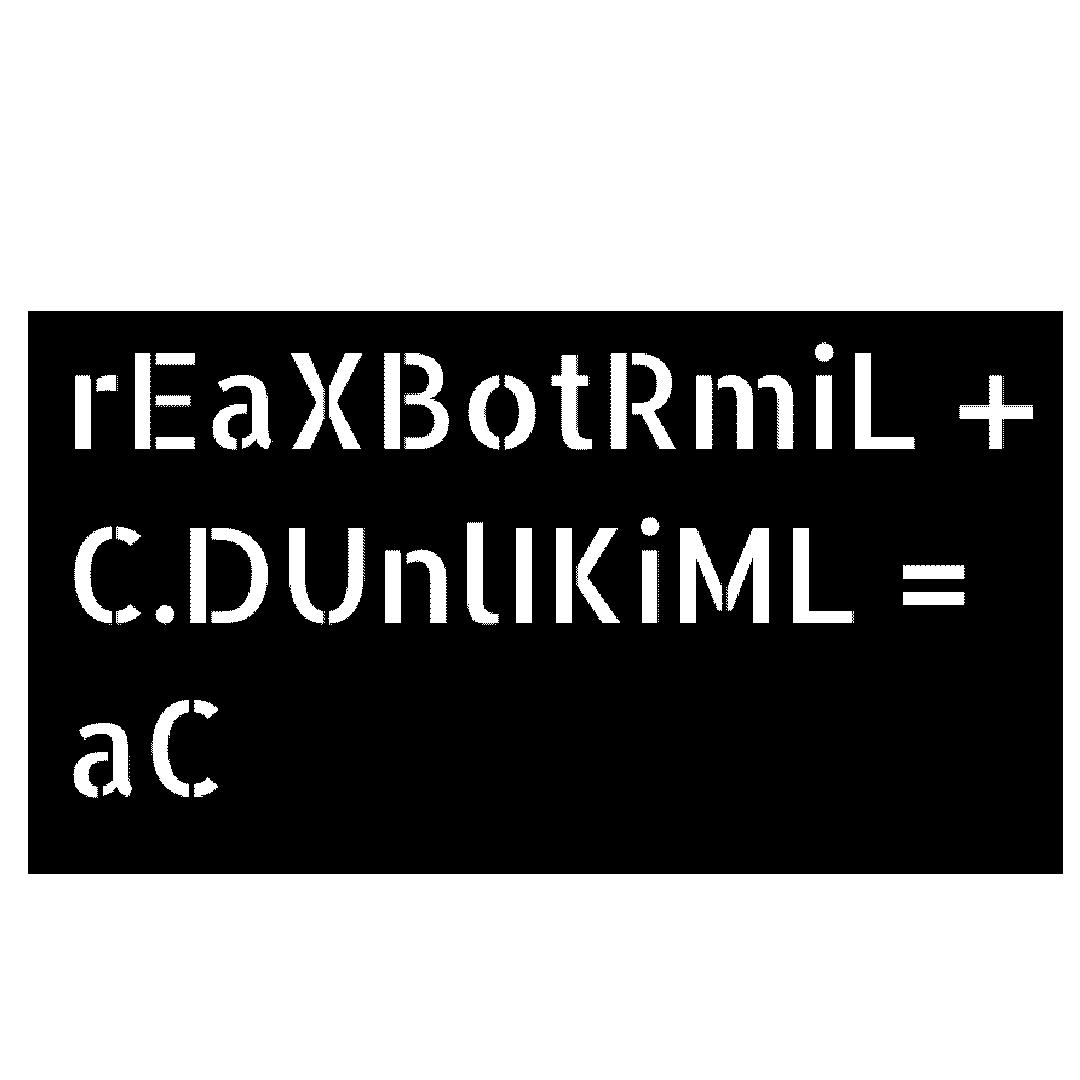

In [ ]:
import os
import PIL

directory = "test"
for file in os.listdir(directory)[:20]:
    img_path = os.path.join(directory, file)
    pred = model.predict(model_utils.load_image(img_path))
    class_label = np.argmax(pred)
    display_image(class_label, img_path)
    input()
    
    display.clear_output()

# Predict the real image

Success! By training the neural net on thousands of made up images, I saved myself the work and cost of creating thousands of incorrectly worded plates and having to take pictures of each one of them

[[ 0.  1.]]


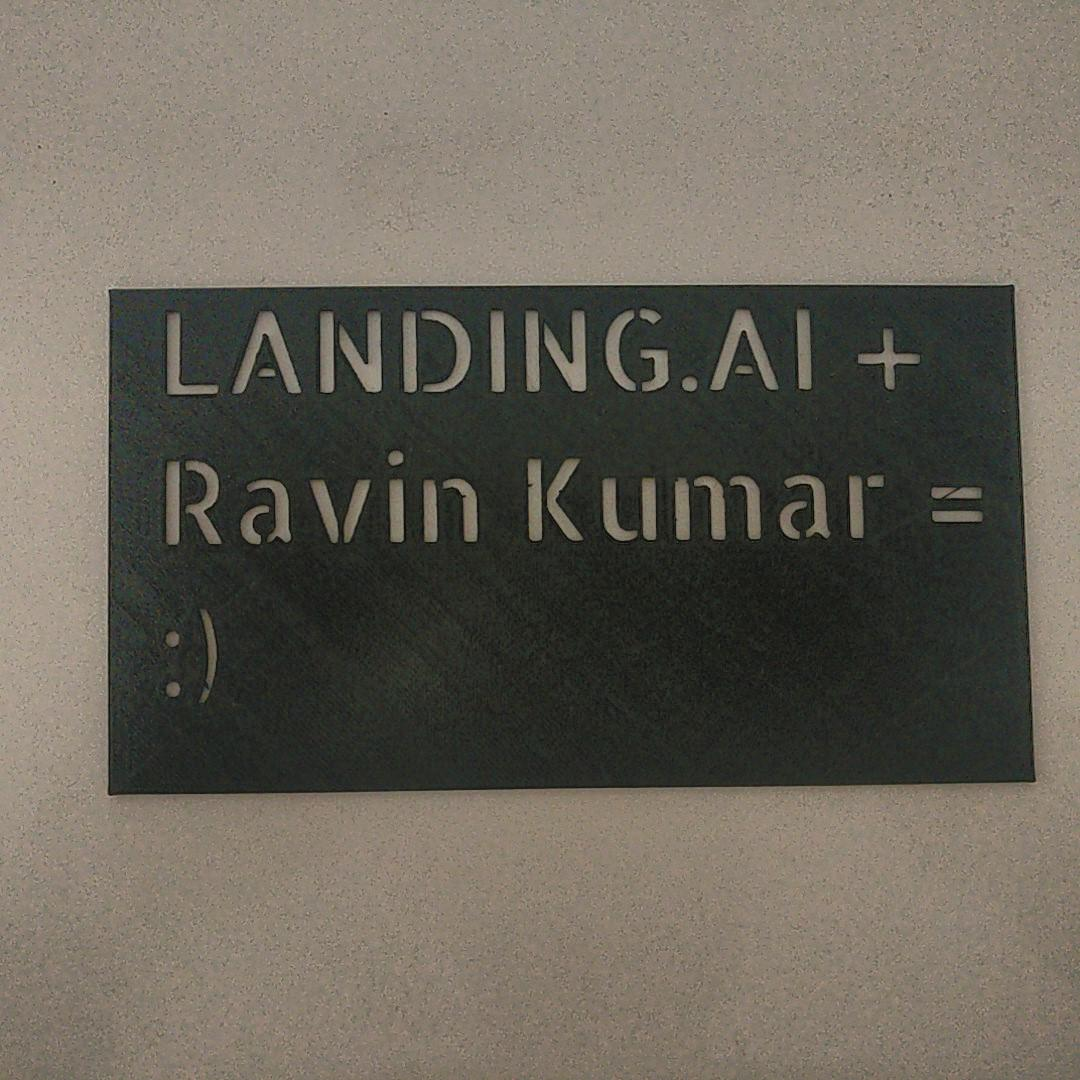

In [11]:
camera_image_path = os.path.join("camera_image", "3Dprint.jpg")
camera_image = model_utils.load_camera_image(camera_image_path)
pred = model.predict(camera_image)
print(pred)
class_label = np.argmax(pred)
display_image(class_label, camera_image_path)
